In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [30]:
#Download font Thai
#Thanks and Follow website https://www.facebook.com/groups/colab.thailand/permalink/1421960354645985/
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')


**Download Data from Ministry of Transport**

In [29]:
df_accident = pd.read_csv('https://datagov.mot.go.th/dataset/7e077ffd-dc4f-4dc6-a71c-0813726f3c12/resource/733b7874-bd5f-44b9-b271-650890b061f2/download/accident2022.csv')  
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ปีที่เกิดเหตุ                            10791 non-null  int64  
 1   วันที่เกิดเหตุ                           10791 non-null  object 
 2   เวลา                                     10791 non-null  object 
 3   วันที่รายงาน                             10790 non-null  object 
 4   เวลาที่รายงาน                            10790 non-null  object 
 5   ACC_CODE                                 10791 non-null  int64  
 6   หน่วยงาน                                 10791 non-null  object 
 7   รหัสสายทาง                               10791 non-null  object 
 8   สายทาง                                   10791 non-null  object 
 9   ก.ม.                                     10668 non-null  float64
 10  จังหวัด                                  10788

In [31]:
df=df_accident

**What time is the highest accident with dead in a day**

In [32]:
#Convert 'เวลา' from object to time
df['เวลา'] = pd.to_datetime(df['เวลา'], format = "%H:%M")

#change dataframe to count the total event by hour
df['เวลา'] = pd.to_datetime(df['เวลา']).dt.hour

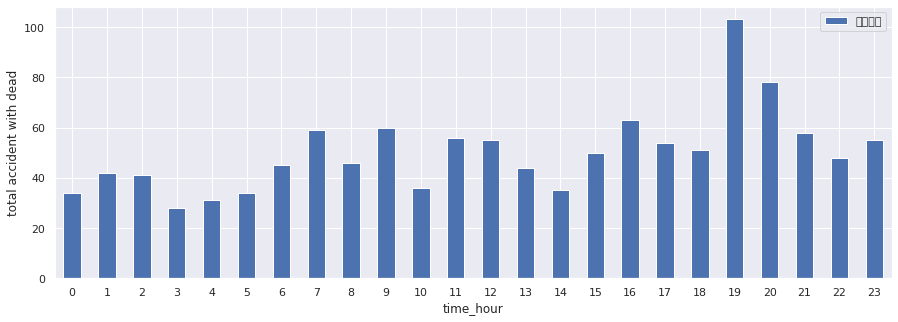

In [34]:
#Filter only row that has total dead > 0 and plot as bar chart
dead=df.loc[df['จำนวนผู้เสียชีวิต']>0]
dead=dead.groupby(['เวลา'])[['เวลา']].count()
dead.plot.bar(xlabel='time_hour',ylabel='total accident with dead',rot=0, figsize=(15,5),edgecolor='white')

**What is the possible main cause of accident in Thailand during Jan to Jun2 2022?**

In [35]:
col = list(df)
print(col)

['ปีที่เกิดเหตุ', 'วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน', 'เวลาที่รายงาน', 'ACC_CODE', 'หน่วยงาน', 'รหัสสายทาง', 'สายทาง', 'ก.ม.', 'จังหวัด', 'รถคันที่ 1', 'บริเวณที่เกิดเหตุ/ลักษณะทาง', 'มูลเหตุสันนิษฐาน', 'ลักษณะการเกิดอุบัติเหตุ', 'สภาพอากาศ', 'LATITUDE', 'LONGITUDE', 'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)', 'จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)', 'รถจักรยานยนต์', 'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถตู้', 'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า 4 ล้อ', 'รถปิคอัพบรรทุก 4 ล้อ', 'รถบรรทุก 6 ล้อ', 'รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ', 'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)', 'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า', 'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย', 'รวมจำนวนผู้บาดเจ็บ']


In [36]:
#Combine all dead and injury people as a new column
df['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']=df['จำนวนผู้เสียชีวิต']+df['รวมจำนวนผู้บาดเจ็บ']
df

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,รหัสสายทาง,สายทาง,ก.ม.,...,รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง),รถอีแต๋น,อื่นๆ,คนเดินเท้า,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
0,2022,1/1/2022,0,2/1/2022,11:45,6566872,กรมทางหลวงชนบท,ชน.5016,เทศบาลตำบลวัดสิงห์ - บ้านน้ำพุ (ช่วงหันคา),17.430,...,0,0,0,0,0,0,1,0,1,1
1,2022,1/1/2022,0,2/1/2022,11:44,6566880,กรมทางหลวงชนบท,มค.4012,แยกทางหลวงหมายเลข 2152 (กม.ที่ 31+700) - บ้านก...,0.500,...,0,0,0,0,0,0,0,1,1,1
2,2022,1/1/2022,0,9/2/2022,8:41,5706553,กรมทางหลวง,4,พ่อตาหินช้าง - วังครก,469.800,...,0,0,0,0,0,1,0,0,0,1
3,2022,1/1/2022,0,2/1/2022,6:21,5485750,กรมทางหลวง,4030,ถลาง - หาดราไวย์,17.125,...,0,0,0,0,0,0,0,1,1,1
4,2022,1/1/2022,0,24/1/2022,9:59,5624452,กรมทางหลวง,216,ถนนวงแหวนรอบเมืองอุดรธานีด้านทิศตะวันออก,25.350,...,0,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,2022,30/6/2022,20,14/7/2022,11:26,6549140,กรมทางหลวง,304,ปากเกร็ด - คลองประปา,3.530,...,0,0,0,0,0,0,0,0,0,0
10787,2022,30/6/2022,20,6/7/2022,9:46,6501369,กรมทางหลวง,23,เสลภูมิ - ยโสธร,172.540,...,0,0,0,0,0,0,0,1,1,1
10788,2022,30/6/2022,23,11/7/2022,9:05,6531356,กรมทางหลวง,32,ไชโย - สิงห์ใต้,82.620,...,1,0,0,0,0,1,0,0,0,1
10789,2022,30/6/2022,23,6/9/2022,19:25,6853551,กรมทางหลวง,331,สี่แยกนาน้อย - เขาหินซ้อน,139.055,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Prepare datafram for find the possible main cause
cause=df[['มูลเหตุสันนิษฐาน','จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย', 'รวมจำนวนผู้บาดเจ็บ','รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']].groupby('มูลเหตุสันนิษฐาน')
cause.agg('sum').sort_values(by=['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'], ascending=False)

,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
มูลเหตุสันนิษฐาน,,,,,
ขับรถเร็วเกินอัตรากำหนด,1002,1030,4770,5800,6802
คน/รถ/สัตว์ตัดหน้ากระชั้นชิด,213,181,708,889,1102
หลับใน,63,91,523,614,677
อุปกรณ์ยานพาหนะบกพร่อง,22,40,233,273,295
ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร,18,38,136,174,192
เมาสุรา,25,38,127,165,190
แซงรถอย่างผิดกฎหมาย,21,13,53,66,87
ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ,8,14,46,60,68
อื่นๆ,2,5,25,30,32


([<matplotlib.patches.Wedge at 0x7fb39769f0d0>,
 [Text(-0.6550586063997749, 0.8836844584927275, 'ขับรถเร็วเกินอัตรากำหนด'),
  Text(0.06906976266458831, -1.0978293892429085, 'คน/รถ/สัตว์ตัดหน้ากระชั้นชิด'),
  Text(0.6573520213749278, -0.8819797730074636, 'หลับใน'),
  Text(0.898653563623455, -0.6343672221882724, 'อุปกรณ์ยานพาหนะบกพร่อง'),
  Text(0.9873388507933066, -0.4849350407159217, 'ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร'),
  Text(1.039750289224379, -0.35905338886831345, 'เมาสุรา'),
  Text(1.0677988994676244, -0.264207324455115, 'แซงรถอย่างผิดกฎหมาย'),
  Text(1.0797387901733095, -0.21015267068271543, 'ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ'),
  Text(1.0859923309780481, -0.1749875911511032, 'อื่นๆ'),
  Text(1.0893445545890506, -0.15273650967330446, 'มีกองวัสดุ/สิ่งกีดขวาง'),
  Text(1.0921559914514976, -0.13113081383334915, 'ฝ่าฝืนป้ายหยุดขณะออกจากทางร่วมทางแยก'),
  Text(1.0944317892756887, -0.11053985083586101, 'เปลี่ยนช่องทางกะทันหัน'),
  Text(1.09620170634877, -0.091333558991454, 'ขับรถตามกระชั้น

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3586 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3606 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s

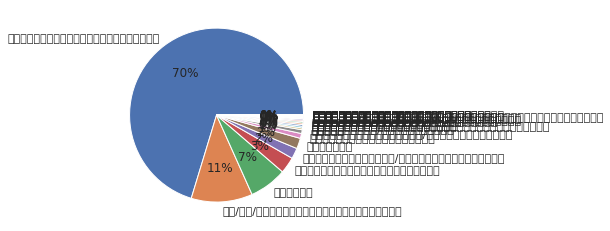

In [38]:
total=df.groupby(['มูลเหตุสันนิษฐาน'])[['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']].sum()
total.reset_index(drop=False,inplace=True)
total=total.sort_values(by=['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'], ascending=False)
cause_list = total['มูลเหตุสันนิษฐาน'].values.tolist()
data_list = total['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'].values.tolist()
plt.rcParams['font.family']='TH Sarabun New'
plt.pie(data_list,labels=cause_list,autopct='%.0f%%')

**How the accidents are happened due to exceeding the speed limit**



In [41]:
#filter the main cause from exceeding the speed limit and drop the NA row in column 'มูลเหตุสัษฐาน'
speed=df.dropna(subset=['มูลเหตุสันนิษฐาน']).reset_index()
speed=speed.loc[speed['มูลเหตุสันนิษฐาน'].str.contains('เร็วเกิน', case=False)]

#How the accident are possible happened due to exceed the speed limit
speed_how=pd.DataFrame(speed['ลักษณะการเกิดอุบัติเหตุ'].value_counts(ascending=False))
speed_how

,ลักษณะการเกิดอุบัติเหตุ
พลิกคว่ำ/ตกถนนในทางตรง,3593
ชนท้าย,2248
พลิกคว่ำ/ตกถนนในทางโค้ง,1071
ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง),290
ชนสิ่งกีดขวาง (บนผิวจราจร),204
ชนคนเดินเท้า,82
อื่นๆ,47
ชนเป็นมุมบริเวณทางแยก,41
ชนด้านข้าง,3
เลี้ยว/ถอยชน,1


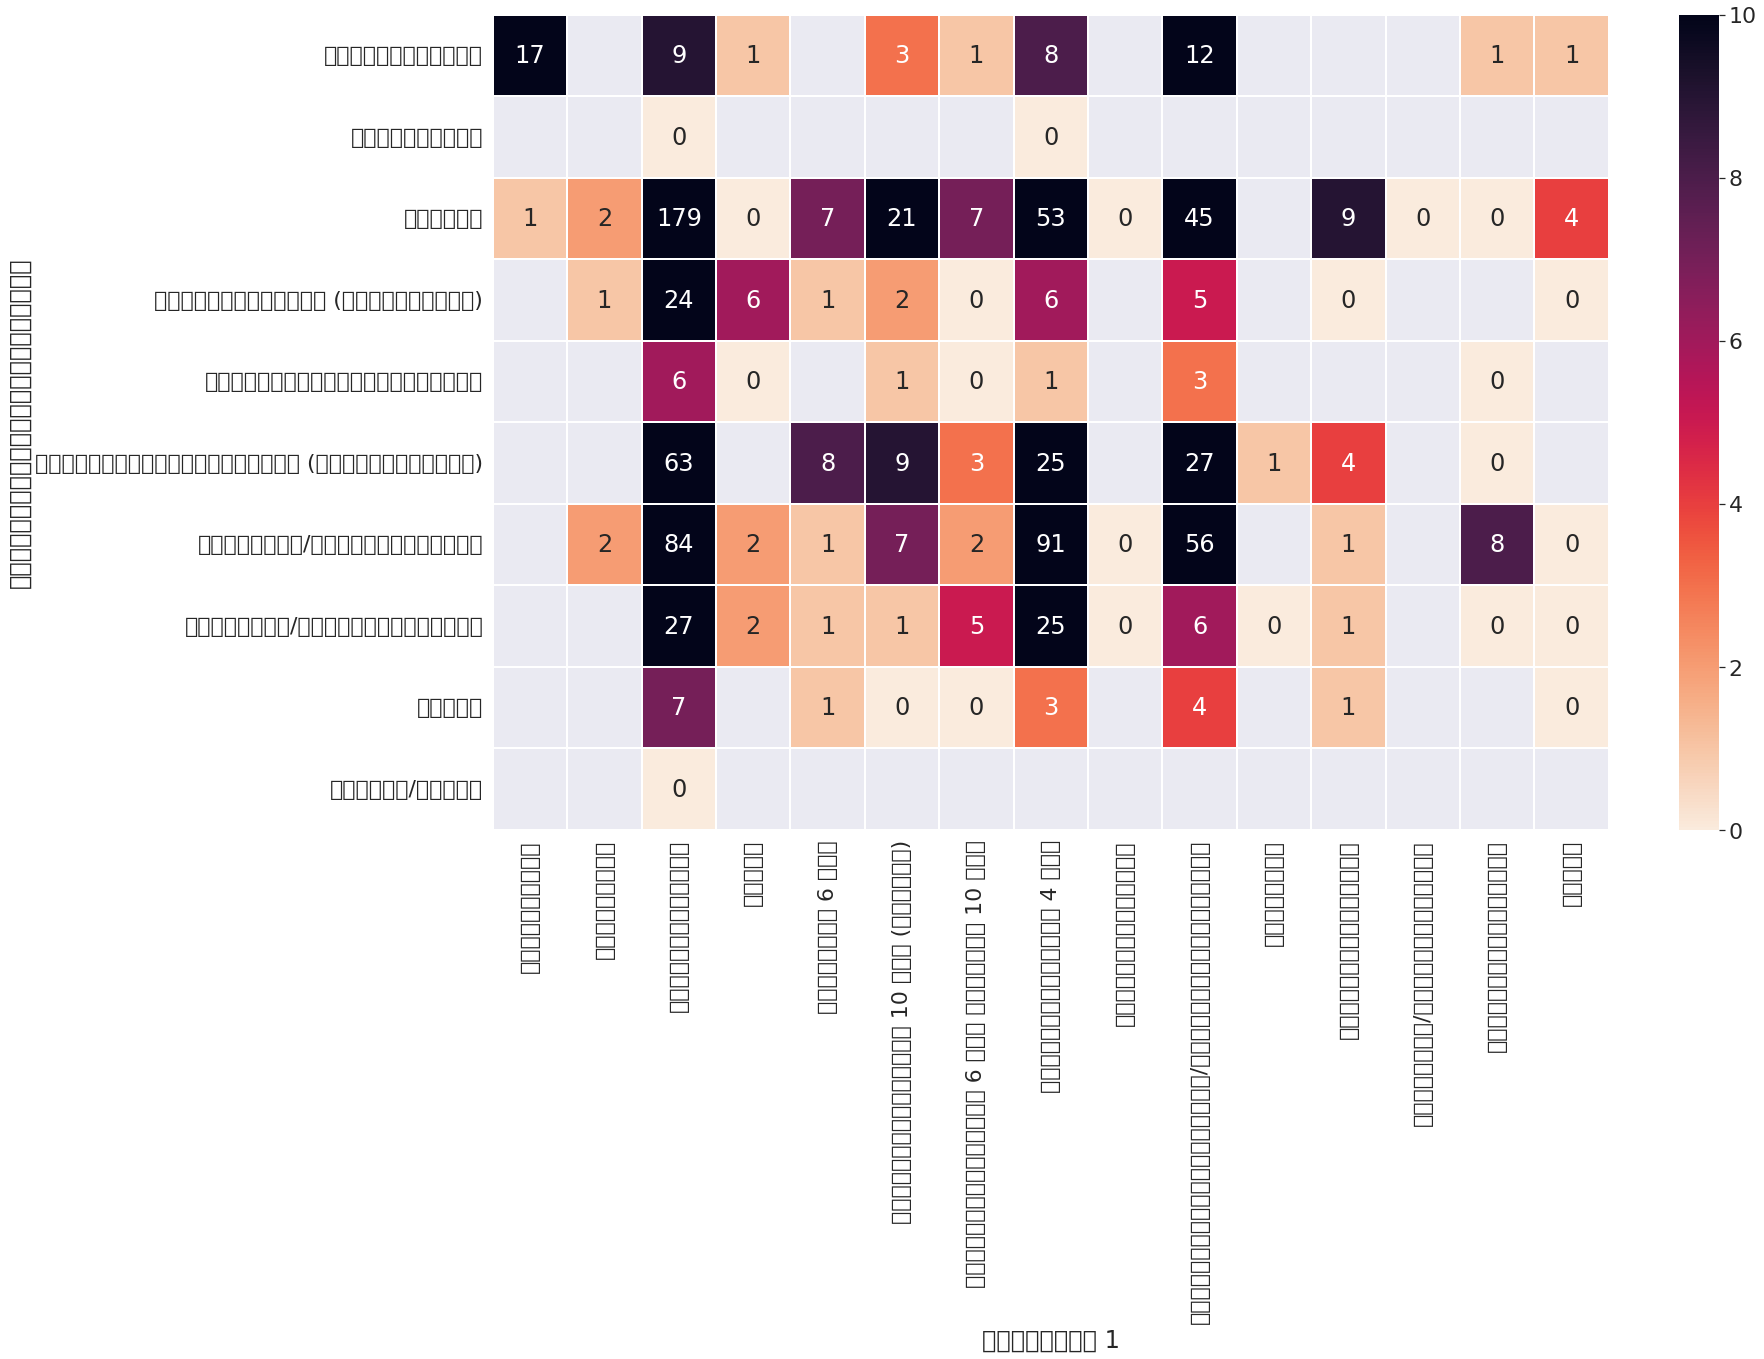

In [52]:
#adding parameter of type of root cuase
speed_lost_sum=speed.pivot_table(index='ลักษณะการเกิดอุบัติเหตุ', columns='รถคันที่ 1', values='จำนวนผู้เสียชีวิต', aggfunc='sum')
sns.set(rc={'figure.figsize':(25,15)},font_scale=2)
ax = sns.heatmap(speed_lost_sum, linewidths=1, vmin=0, cmap='rocket_r', vmax=10,annot=True, fmt='.0f')

**Does raining impact to acciden?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.patches.Wedge at 0x7fb3927d3490>,
 [Text(-1.0122861183623812, 0.43043793347104425, ''),
  Text(0.9966338507041357, -0.46553299306348483, ''),
  Text(1.0987311138014833, -0.052819878498084505, ''),
  Text(1.099826545621006, -0.019533805245408858, ''),
  Text(1.0999794424946987, -0.006725034501907948, ''),
  Text(1.0999988346552925, -0.0016011736316161374, '')],
 [Text(-0.5521560645612988, 0.2347843273478423, '87%'),
  Text(0.5436184640204376, -0.2539270871255372, '12%'),
  Text(0.5993078802553544, -0.028810842817137, '1%'),
  Text(0.5999053885205486, -0.010654802861132103, '0%'),
  Text(0.5999887868152901, -0.003668200637404335, '0%'),
  Text(0.5999993643574322, -0.000873367435426984, '0%')])

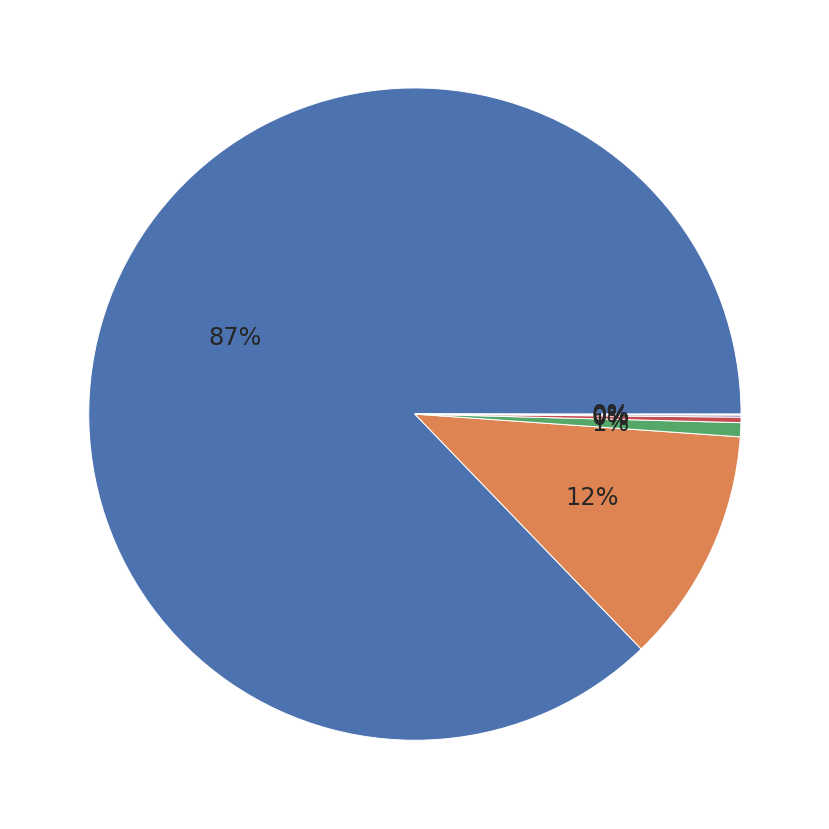

In [71]:
weather=pd.DataFrame(df['สภาพอากาศ'].value_counts(ascending=False))
weather.columns=['จำนวนอุบัติเหตุ']
plt.pie(weather,autopct='%.0f%%')